In [1]:
import torch
import numpy as np
import plotly.graph_objects as go
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

from torch_utils import *
from normals import compute_normals
from bunny import get_bunny
from sirens import Siren, gradient
from igr import IGR
from sphere_trace import render

In [2]:
def sample_on_rays(pc, ego, num_samples=10):
    sample_pts = torch.clamp(trand(num_samples).expand(3, pc.shape[0], num_samples).transpose(0, 2), max=0.8)
    sample_space = (pc - ego).expand(num_samples, pc.shape[0], 3)

    return sample_pts * sample_space

<ipython-input-3-8480d78f0168>:32: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  aligned = (aligned > 0).nonzero()


reconstruction loss tensor(201.5089, device='cuda:0', grad_fn=<MulBackward0>) eikonal loss tensor(2.6762, device='cuda:0', grad_fn=<MulBackward0>) exterior loss tensor(2.0679, device='cuda:0', grad_fn=<MulBackward0>) inter loss tensor(0.3496, device='cuda:0', grad_fn=<MulBackward0>) normal_loss tensor(95.1933, device='cuda:0', grad_fn=<MulBackward0>)
worst of last batch tensor(0.5471, device='cuda:0', grad_fn=<MaxBackward1>)


/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



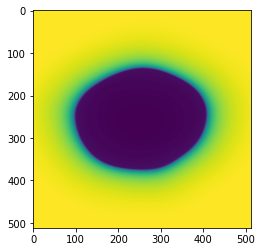

epoch 1: 147.69187927246094
epoch 2: 113.23748016357422
epoch 3: 103.36192321777344
epoch 4: 102.12398529052734
epoch 5: 81.84127807617188
epoch 6: 80.88714599609375
epoch 7: 75.07122802734375
epoch 8: 68.26506042480469
epoch 9: 60.10938262939453
epoch 11: 50.16305160522461
epoch 12: 44.862125396728516
epoch 13: 40.21757125854492
epoch 14: 33.16506576538086
epoch 15: 30.47035789489746
epoch 16: 32.53596496582031
epoch 17: 30.819318771362305
epoch 18: 21.077651977539062
epoch 19: 18.756746292114258
epoch 21: 18.065650939941406
epoch 22: 16.17403793334961
epoch 23: 14.580148696899414
epoch 24: 15.520219802856445
epoch 25: 14.401895523071289
epoch 26: 11.129241943359375
epoch 27: 12.757648468017578
epoch 28: 11.331331253051758
epoch 29: 9.728878021240234
epoch 31: 9.503622055053711
epoch 32: 9.339609146118164
epoch 33: 9.127259254455566
epoch 34: 8.91476821899414
epoch 35: 8.632804870605469
epoch 36: 8.613082885742188
epoch 37: 8.098777770996094
epoch 38: 7.93804931640625
epoch 39: 8.2305

epoch 314: 1.5090720653533936
epoch 315: 1.8662155866622925
epoch 316: 1.8736835718154907
epoch 317: 2.319828510284424
epoch 318: 1.9328229427337646
epoch 319: 1.9151005744934082
epoch 321: 1.8189066648483276
epoch 322: 2.038429021835327
epoch 323: 1.910421371459961
epoch 324: 1.9749095439910889
epoch 325: 1.9097366333007812
epoch 326: 1.4978426694869995
epoch 327: 1.7464603185653687
epoch 328: 1.5649760961532593
epoch 329: 1.8255854845046997
epoch 331: 2.1536076068878174
epoch 332: 2.153501272201538
epoch 333: 1.784292459487915
epoch 334: 2.1534361839294434
epoch 335: 2.053166151046753
epoch 336: 2.0709807872772217
epoch 337: 2.4672515392303467
epoch 338: 1.7237056493759155
epoch 339: 2.3542258739471436
epoch 341: 1.853779911994934
epoch 342: 2.2051525115966797
epoch 343: 2.0196337699890137
epoch 344: 2.4228546619415283
epoch 345: 1.5427128076553345
epoch 346: 2.6178674697875977
epoch 347: 2.1183600425720215
epoch 348: 2.518069267272949
epoch 349: 1.9512269496917725
epoch 351: 2.12470

epoch 621: 1.5817570686340332
epoch 622: 1.6299406290054321
epoch 623: 1.6337995529174805
epoch 624: 1.5483506917953491
epoch 625: 1.8475812673568726
epoch 626: 2.0692625045776367
epoch 627: 1.5738128423690796
epoch 628: 1.8623453378677368
epoch 629: 1.885288953781128
epoch 631: 1.7160990238189697
epoch 632: 1.394241452217102
epoch 633: 1.5924785137176514
epoch 634: 1.5063982009887695
epoch 635: 1.57847261428833
epoch 636: 1.8414055109024048
epoch 637: 1.674544334411621
epoch 638: 1.7581841945648193
epoch 639: 1.6000219583511353
epoch 641: 1.6669102907180786
epoch 642: 1.5524535179138184
epoch 643: 1.860918641090393
epoch 644: 1.577052116394043
epoch 645: 1.673957109451294
epoch 646: 1.490248203277588
epoch 647: 1.5950384140014648
epoch 648: 1.7284401655197144
epoch 649: 1.671281337738037
epoch 651: 1.6313058137893677
epoch 652: 1.7281913757324219
epoch 653: 1.590651512145996
epoch 654: 1.7729474306106567
epoch 655: 1.2475292682647705
epoch 656: 1.761703610420227
epoch 657: 1.324136972

epoch 927: 1.0229078531265259
epoch 928: 1.3942852020263672
epoch 929: 1.4071345329284668
epoch 931: 1.4455666542053223
epoch 932: 1.7228326797485352
epoch 933: 1.8964638710021973
epoch 934: 1.418514370918274
epoch 935: 1.9461281299591064
epoch 936: 1.0777705907821655
epoch 937: 1.8813443183898926
epoch 938: 1.5660231113433838
epoch 939: 1.3481444120407104
epoch 941: 1.317234992980957
epoch 942: 1.54668128490448
epoch 943: 1.6977713108062744
epoch 944: 1.5309127569198608
epoch 945: 1.4085544347763062
epoch 946: 1.6802091598510742
epoch 947: 1.3036121129989624
epoch 948: 1.9865219593048096
epoch 949: 1.6639015674591064
epoch 951: 1.773746371269226
epoch 952: 1.4402391910552979
epoch 953: 1.5336774587631226
epoch 954: 1.72147798538208
epoch 955: 1.2063937187194824
epoch 956: 1.7153701782226562
epoch 957: 1.2955207824707031
epoch 958: 1.4058518409729004
epoch 959: 1.6506152153015137
epoch 961: 1.3926888704299927
epoch 962: 1.2677689790725708
epoch 963: 1.7891764640808105
epoch 964: 1.4822

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



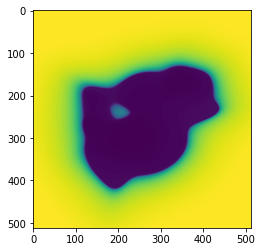

epoch 1001: 1.0258303880691528
epoch 1002: 1.1955214738845825
epoch 1003: 1.085161566734314
epoch 1004: 1.4261643886566162
epoch 1005: 1.2198903560638428
epoch 1006: 1.0121389627456665
epoch 1007: 1.1963950395584106
epoch 1008: 1.3756299018859863
epoch 1009: 1.2675235271453857
epoch 1011: 1.5825766324996948
epoch 1012: 1.2948812246322632
epoch 1013: 1.2290257215499878
epoch 1014: 1.1494529247283936
epoch 1015: 1.2512385845184326
epoch 1016: 1.6135543584823608
epoch 1017: 1.575766682624817
epoch 1018: 1.4437987804412842
epoch 1019: 1.4347469806671143
epoch 1021: 1.4329938888549805
epoch 1022: 1.774613380432129
epoch 1023: 1.316894292831421
epoch 1024: 2.0306894779205322
epoch 1025: 2.3852529525756836
epoch 1026: 1.3885774612426758
epoch 1027: 2.484623432159424
epoch 1028: 1.1808199882507324
epoch 1029: 2.1924514770507812
epoch 1031: 1.434483289718628
epoch 1032: 1.89188551902771
epoch 1033: 1.6288071870803833
epoch 1034: 1.9834585189819336
epoch 1035: 1.6818816661834717
epoch 1036: 2.20

epoch 1297: 0.9921870231628418
epoch 1298: 1.2150121927261353
epoch 1299: 1.1319420337677002
epoch 1301: 1.2086765766143799
epoch 1302: 1.2115229368209839
epoch 1303: 1.4567979574203491
epoch 1304: 1.25285804271698
epoch 1305: 1.1053091287612915
epoch 1306: 1.2017357349395752
epoch 1307: 1.0546530485153198
epoch 1308: 1.1998531818389893
epoch 1309: 1.1391202211380005
epoch 1311: 1.2626700401306152
epoch 1312: 1.156646966934204
epoch 1313: 1.547310709953308
epoch 1314: 1.3031363487243652
epoch 1315: 2.0898959636688232
epoch 1316: 1.2263253927230835
epoch 1317: 1.5426347255706787
epoch 1318: 1.535813808441162
epoch 1319: 1.6346094608306885
epoch 1321: 1.2844072580337524
epoch 1322: 1.1468905210494995
epoch 1323: 1.299854040145874
epoch 1324: 1.2220263481140137
epoch 1325: 1.4980690479278564
epoch 1326: 1.278230905532837
epoch 1327: 1.2839629650115967
epoch 1328: 1.8745754957199097
epoch 1329: 1.1980562210083008
epoch 1331: 1.439969539642334
epoch 1332: 1.5160675048828125
epoch 1333: 1.35

epoch 1594: 1.2327880859375
epoch 1595: 1.343165636062622
epoch 1596: 1.3754286766052246
epoch 1597: 1.3509547710418701
epoch 1598: 1.5551583766937256
epoch 1599: 1.1543169021606445
epoch 1601: 1.5385899543762207
epoch 1602: 1.2661969661712646
epoch 1603: 0.8075583577156067
epoch 1604: 1.08897864818573
epoch 1605: 1.4235128164291382
epoch 1606: 1.1724172830581665
epoch 1607: 1.0676301717758179
epoch 1608: 0.9649677872657776
epoch 1609: 1.2144795656204224
epoch 1611: 1.30514395236969
epoch 1612: 1.3022420406341553
epoch 1613: 0.9396302700042725
epoch 1614: 1.199407696723938
epoch 1615: 1.1611250638961792
epoch 1616: 1.0646355152130127
epoch 1617: 0.9244544506072998
epoch 1618: 1.1831164360046387
epoch 1619: 0.9894291162490845
epoch 1621: 1.1707491874694824
epoch 1622: 1.1625652313232422
epoch 1623: 1.0652046203613281
epoch 1624: 1.160994052886963
epoch 1625: 1.2159446477890015
epoch 1626: 0.936874508857727
epoch 1627: 1.1661391258239746
epoch 1628: 1.0412557125091553
epoch 1629: 1.16389

epoch 1891: 0.95737224817276
epoch 1892: 0.7466937303543091
epoch 1893: 0.8213448524475098
epoch 1894: 1.189108967781067
epoch 1895: 1.0706039667129517
epoch 1896: 1.1190801858901978
epoch 1897: 1.0615785121917725
epoch 1898: 1.1241815090179443
epoch 1899: 0.9718215465545654
epoch 1901: 0.8203162550926208
epoch 1902: 1.017558217048645
epoch 1903: 1.5908395051956177
epoch 1904: 0.9068203568458557
epoch 1905: 1.4089996814727783
epoch 1906: 0.7991379499435425
epoch 1907: 1.0504175424575806
epoch 1908: 0.990371584892273
epoch 1909: 1.201906681060791
epoch 1911: 1.0209970474243164
epoch 1912: 1.1945586204528809
epoch 1913: 0.7765883207321167
epoch 1914: 1.321282148361206
epoch 1915: 1.211625337600708
epoch 1916: 1.371767520904541
epoch 1917: 1.0999916791915894
epoch 1918: 1.1965019702911377
epoch 1919: 1.0674299001693726
epoch 1921: 1.1655733585357666
epoch 1922: 0.7739119529724121
epoch 1923: 1.0516952276229858
epoch 1924: 0.930911660194397
epoch 1925: 0.8833541870117188
epoch 1926: 1.1126

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



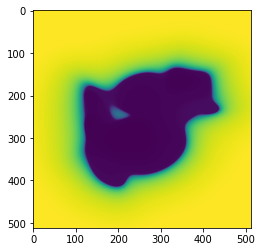

epoch 2001: 0.8724780678749084
epoch 2002: 0.9309201240539551
epoch 2003: 1.0226043462753296
epoch 2004: 0.9270995259284973
epoch 2005: 1.0188958644866943
epoch 2006: 0.9333833456039429
epoch 2007: 0.7107035517692566
epoch 2008: 0.7005065679550171
epoch 2009: 0.8966981172561646
epoch 2011: 0.8729881644248962
epoch 2012: 0.9723063707351685
epoch 2013: 0.8476083278656006
epoch 2014: 1.2136256694793701
epoch 2015: 1.0076045989990234
epoch 2016: 1.042153239250183
epoch 2017: 0.9923959374427795
epoch 2018: 1.0212911367416382
epoch 2019: 1.10745108127594
epoch 2021: 1.0476311445236206
epoch 2022: 1.0137814283370972
epoch 2023: 1.389211654663086
epoch 2024: 1.2557833194732666
epoch 2025: 1.189042329788208
epoch 2026: 1.459342360496521
epoch 2027: 0.7980296015739441
epoch 2028: 1.2219173908233643
epoch 2029: 0.8566034436225891
epoch 2031: 1.0209709405899048
epoch 2032: 1.0334324836730957
epoch 2033: 1.1650440692901611
epoch 2034: 0.9259926080703735
epoch 2035: 1.428423523902893
epoch 2036: 0.8

epoch 2297: 0.9705311059951782
epoch 2298: 1.006582498550415
epoch 2299: 1.0814557075500488
epoch 2301: 0.8637344241142273
epoch 2302: 0.726163387298584
epoch 2303: 0.9348491430282593
epoch 2304: 0.9138882160186768
epoch 2305: 0.7861984372138977
epoch 2306: 0.9003409147262573
epoch 2307: 0.8293112516403198
epoch 2308: 0.8764417767524719
epoch 2309: 0.784856379032135
epoch 2311: 0.9288541078567505
epoch 2312: 0.961530864238739
epoch 2313: 0.8115206956863403
epoch 2314: 0.7078576683998108
epoch 2315: 0.7957362532615662
epoch 2316: 1.0102829933166504
epoch 2317: 0.7598037123680115
epoch 2318: 1.0234216451644897
epoch 2319: 0.8232922554016113
epoch 2321: 0.935312032699585
epoch 2322: 0.9605711102485657
epoch 2323: 0.7555084824562073
epoch 2324: 0.9660025238990784
epoch 2325: 0.7389695644378662
epoch 2326: 0.9817065000534058
epoch 2327: 1.1796960830688477
epoch 2328: 1.1264793872833252
epoch 2329: 1.0372793674468994
epoch 2331: 1.096165418624878
epoch 2332: 1.0133185386657715
epoch 2333: 1.

epoch 2594: 1.1220827102661133
epoch 2595: 1.3766944408416748
epoch 2596: 1.0294549465179443
epoch 2597: 1.3737208843231201
epoch 2598: 1.0028536319732666
epoch 2599: 1.583677053451538
epoch 2601: 0.9099047183990479
epoch 2602: 1.7625313997268677
epoch 2603: 0.8285480737686157
epoch 2604: 1.4402976036071777
epoch 2605: 0.7231994271278381
epoch 2606: 1.3668936491012573
epoch 2607: 1.2326122522354126
epoch 2608: 1.1656161546707153
epoch 2609: 1.3746449947357178
epoch 2611: 1.2061185836791992
epoch 2612: 0.8096144199371338
epoch 2613: 1.1986883878707886
epoch 2614: 1.2438690662384033
epoch 2615: 0.7270992398262024
epoch 2616: 0.8781925439834595
epoch 2617: 0.9176721572875977
epoch 2618: 0.8220515847206116
epoch 2619: 0.8214658498764038
epoch 2621: 0.9797134399414062
epoch 2622: 0.8487398624420166
epoch 2623: 0.7209213972091675
epoch 2624: 0.8280662298202515
epoch 2625: 0.9278078079223633
epoch 2626: 0.7772654891014099
epoch 2627: 0.7331668138504028
epoch 2628: 0.8157312870025635
epoch 262

epoch 2891: 0.6386367082595825
epoch 2892: 0.7942916750907898
epoch 2893: 0.6198855638504028
epoch 2894: 0.8827713131904602
epoch 2895: 0.5706585645675659
epoch 2896: 0.7081934809684753
epoch 2897: 0.8259619474411011
epoch 2898: 0.8714570999145508
epoch 2899: 0.6024552583694458
epoch 2901: 0.6810641288757324
epoch 2902: 0.6143203973770142
epoch 2903: 0.7799488306045532
epoch 2904: 0.798413872718811
epoch 2905: 0.7797511219978333
epoch 2906: 0.6936472654342651
epoch 2907: 0.8754214644432068
epoch 2908: 0.6905701160430908
epoch 2909: 0.8313642144203186
epoch 2911: 0.7320493459701538
epoch 2912: 0.7967908382415771
epoch 2913: 0.6364662647247314
epoch 2914: 0.9031177759170532
epoch 2915: 0.7761613130569458
epoch 2916: 0.657976508140564
epoch 2917: 0.8152799010276794
epoch 2918: 0.6390697956085205
epoch 2919: 0.7405898571014404
epoch 2921: 0.7654650807380676
epoch 2922: 0.5333354473114014
epoch 2923: 0.5894660949707031
epoch 2924: 0.8987199068069458
epoch 2925: 0.8659469485282898
epoch 2926

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



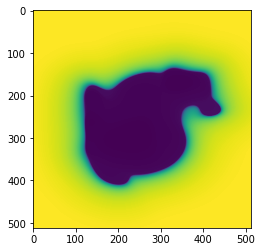

epoch 3001: 0.9802458882331848
epoch 3002: 0.8319511413574219
epoch 3003: 0.8216670155525208
epoch 3004: 1.0097262859344482
epoch 3005: 0.9186851382255554
epoch 3006: 1.1884698867797852
epoch 3007: 0.7450456023216248
epoch 3008: 0.9428356885910034
epoch 3009: 0.8797982931137085
epoch 3011: 0.6455233693122864
epoch 3012: 0.9390619397163391
epoch 3013: 0.8633583188056946
epoch 3014: 0.9600900411605835
epoch 3015: 0.8066703081130981
epoch 3016: 0.9594110250473022
epoch 3017: 0.8128551244735718
epoch 3018: 1.0001413822174072
epoch 3019: 0.8074821829795837
epoch 3021: 0.7397819757461548
epoch 3022: 0.6928821802139282
epoch 3023: 0.5979722738265991
epoch 3024: 0.7553538680076599
epoch 3025: 0.8292696475982666
epoch 3026: 0.754507839679718
epoch 3027: 0.6385136842727661
epoch 3028: 0.7150714993476868
epoch 3029: 0.6326051950454712
epoch 3031: 0.6094329953193665
epoch 3032: 0.6027932167053223
epoch 3033: 0.7019250988960266
epoch 3034: 0.7633734941482544
epoch 3035: 0.8450692892074585
epoch 303

epoch 3297: 0.696349024772644
epoch 3298: 0.7796646952629089
epoch 3299: 0.9206703901290894
epoch 3301: 0.7244009971618652
epoch 3302: 0.7260005474090576
epoch 3303: 0.7534287571907043
epoch 3304: 0.845371425151825
epoch 3305: 0.7195134162902832
epoch 3306: 0.9904993772506714
epoch 3307: 0.84360671043396
epoch 3308: 0.8692553043365479
epoch 3309: 0.7765735983848572
epoch 3311: 0.8092536330223083
epoch 3312: 0.7398799061775208
epoch 3313: 0.8141960501670837
epoch 3314: 0.6504276394844055
epoch 3315: 0.6222829818725586
epoch 3316: 0.8088618516921997
epoch 3317: 0.7077367305755615
epoch 3318: 0.634319007396698
epoch 3319: 0.9260298013687134
epoch 3321: 0.692940354347229
epoch 3322: 0.8109685182571411
epoch 3323: 0.573676347732544
epoch 3324: 0.7108746767044067
epoch 3325: 0.5904473066329956
epoch 3326: 0.5984388589859009
epoch 3327: 0.7049829363822937
epoch 3328: 0.7635327577590942
epoch 3329: 0.7364696264266968
epoch 3331: 1.1104698181152344
epoch 3332: 0.8550925254821777
epoch 3333: 0.9

epoch 3594: 0.7776480913162231
epoch 3595: 0.6460633277893066
epoch 3596: 0.764386773109436
epoch 3597: 0.710185170173645
epoch 3598: 0.8409817218780518
epoch 3599: 0.5991709232330322
epoch 3601: 0.8373916149139404
epoch 3602: 1.1457061767578125
epoch 3603: 0.89101243019104
epoch 3604: 0.8644751310348511
epoch 3605: 0.835320234298706
epoch 3606: 1.0110836029052734
epoch 3607: 0.7070896029472351
epoch 3608: 0.6910213232040405
epoch 3609: 0.8542169332504272
epoch 3611: 0.898341715335846
epoch 3612: 0.5939376354217529
epoch 3613: 0.7529547214508057
epoch 3614: 0.8328129053115845
epoch 3615: 0.7215835452079773
epoch 3616: 0.6162524223327637
epoch 3617: 0.728996992111206
epoch 3618: 0.6891494393348694
epoch 3619: 0.713808536529541
epoch 3621: 0.7306973934173584
epoch 3622: 0.6205214262008667
epoch 3623: 0.803363561630249
epoch 3624: 0.8333866000175476
epoch 3625: 1.070692777633667
epoch 3626: 0.7169092893600464
epoch 3627: 0.8402796983718872
epoch 3628: 0.9783615469932556
epoch 3629: 0.7602

epoch 3891: 0.4159389138221741
epoch 3892: 0.6046091318130493
epoch 3893: 0.39797988533973694
epoch 3894: 0.7501741051673889
epoch 3895: 0.6178926229476929
epoch 3896: 0.5145213603973389
epoch 3897: 0.7184948921203613
epoch 3898: 0.66348797082901
epoch 3899: 0.6478427648544312
epoch 3901: 0.7579763531684875
epoch 3902: 0.8380507230758667
epoch 3903: 0.7285798192024231
epoch 3904: 0.6189280152320862
epoch 3905: 0.6149397492408752
epoch 3906: 0.7401291131973267
epoch 3907: 0.6983185410499573
epoch 3908: 0.6565221548080444
epoch 3909: 0.656211793422699
epoch 3911: 0.5730981826782227
epoch 3912: 0.8635881543159485
epoch 3913: 0.7378202676773071
epoch 3914: 0.9509260058403015
epoch 3915: 0.7660596370697021
epoch 3916: 0.6634572148323059
epoch 3917: 1.009631633758545
epoch 3918: 0.6235294938087463
epoch 3919: 0.922922670841217
epoch 3921: 0.8220975399017334
epoch 3922: 0.8427454829216003
epoch 3923: 0.6287185549736023
epoch 3924: 1.0922454595565796
epoch 3925: 0.8128737807273865
epoch 3926: 

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



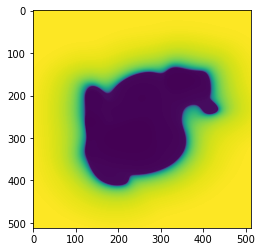

epoch 4001: 0.6117185950279236
epoch 4002: 0.8228952884674072
epoch 4003: 0.6103686690330505
epoch 4004: 0.6643003225326538
epoch 4005: 0.7688499689102173
epoch 4006: 0.6618242263793945
epoch 4007: 0.8163873553276062
epoch 4008: 0.6399778127670288
epoch 4009: 0.8045011758804321
epoch 4011: 0.9268754720687866
epoch 4012: 0.8626797199249268
epoch 4013: 0.838567852973938
epoch 4014: 0.849022626876831
epoch 4015: 0.6967511177062988
epoch 4016: 0.8449419736862183
epoch 4017: 0.7213809490203857
epoch 4018: 0.8165716528892517
epoch 4019: 0.8739988803863525
epoch 4021: 0.7240412831306458
epoch 4022: 0.8361351490020752
epoch 4023: 0.8150202631950378
epoch 4024: 0.8757444620132446
epoch 4025: 0.7796729803085327
epoch 4026: 0.9020763635635376
epoch 4027: 0.783132016658783
epoch 4028: 0.6626071333885193
epoch 4029: 0.9735163450241089
epoch 4031: 1.0242674350738525
epoch 4032: 1.1627320051193237
epoch 4033: 1.021684169769287
epoch 4034: 0.9667780995368958
epoch 4035: 0.7850491404533386
epoch 4036: 

epoch 4297: 0.658861517906189
epoch 4298: 0.8755102753639221
epoch 4299: 0.8783154487609863
epoch 4301: 0.5950345993041992
epoch 4302: 0.8555876016616821
epoch 4303: 0.5483248829841614
epoch 4304: 0.5947226285934448
epoch 4305: 0.8617202639579773
epoch 4306: 0.6982327103614807
epoch 4307: 0.8739829063415527
epoch 4308: 0.575695276260376
epoch 4309: 1.1639084815979004
epoch 4311: 0.76619553565979
epoch 4312: 0.5866074562072754
epoch 4313: 0.7175815105438232
epoch 4314: 0.7753114104270935
epoch 4315: 0.7209559082984924
epoch 4316: 1.1028279066085815
epoch 4317: 0.949983537197113
epoch 4318: 0.737836480140686
epoch 4319: 0.6774520874023438
epoch 4321: 1.0746657848358154
epoch 4322: 0.9892237186431885
epoch 4323: 0.6738521456718445
epoch 4324: 0.5191264748573303
epoch 4325: 0.8470650911331177
epoch 4326: 0.9887734651565552
epoch 4327: 0.8149996995925903
epoch 4328: 0.9729311466217041
epoch 4329: 0.7930196523666382
epoch 4331: 0.9947710037231445
epoch 4332: 0.7319322824478149
epoch 4333: 0.

epoch 4594: 0.584546685218811
epoch 4595: 0.49825119972229004
epoch 4596: 0.6749916076660156
epoch 4597: 0.5193501710891724
epoch 4598: 0.6435452699661255
epoch 4599: 0.5163570046424866
epoch 4601: 0.690590500831604
epoch 4602: 0.6960300803184509
epoch 4603: 0.7060664892196655
epoch 4604: 0.6956965327262878
epoch 4605: 0.5749748945236206
epoch 4606: 0.6791359186172485
epoch 4607: 0.6058964729309082
epoch 4608: 0.5656110048294067
epoch 4609: 0.5746504068374634
epoch 4611: 0.577707052230835
epoch 4612: 0.5195500254631042
epoch 4613: 0.6788306832313538
epoch 4614: 0.546996533870697
epoch 4615: 0.686781644821167
epoch 4616: 0.5776033401489258
epoch 4617: 0.6038339138031006
epoch 4618: 0.650209903717041
epoch 4619: 0.5939218997955322
epoch 4621: 0.5666695833206177
epoch 4622: 0.4833625853061676
epoch 4623: 0.587293267250061
epoch 4624: 0.5542623996734619
epoch 4625: 0.6856590509414673
epoch 4626: 0.5632220506668091
epoch 4627: 0.6668466329574585
epoch 4628: 0.5677837133407593
epoch 4629: 0.

epoch 4891: 0.7342925071716309
epoch 4892: 0.7176637649536133
epoch 4893: 0.5102773904800415
epoch 4894: 0.7094711065292358
epoch 4895: 0.8959194421768188
epoch 4896: 0.7649694681167603
epoch 4897: 0.8285104036331177
epoch 4898: 0.7084690928459167
epoch 4899: 0.6272396445274353
epoch 4901: 0.7114266157150269
epoch 4902: 0.6786173582077026
epoch 4903: 0.57246994972229
epoch 4904: 0.7447201609611511
epoch 4905: 1.042443037033081
epoch 4906: 0.8584319353103638
epoch 4907: 0.9060859084129333
epoch 4908: 0.7447012066841125
epoch 4909: 0.8955113291740417
epoch 4911: 0.7917051911354065
epoch 4912: 0.6557061672210693
epoch 4913: 0.8669401407241821
epoch 4914: 0.7263611555099487
epoch 4915: 0.6350462436676025
epoch 4916: 0.6121349334716797
epoch 4917: 0.5741328001022339
epoch 4918: 0.6531153321266174
epoch 4919: 0.6481908559799194
epoch 4921: 0.6684226989746094
epoch 4922: 0.7812905311584473
epoch 4923: 0.6482617259025574
epoch 4924: 1.0932259559631348
epoch 4925: 0.7703748941421509
epoch 4926:

/home/srinivas/.local/lib/python3.8/site-packages/torch/functional.py:1241: UserWarning:

torch.norm is deprecated and may be removed in a future PyTorch release. Use torch.linalg.norm instead.



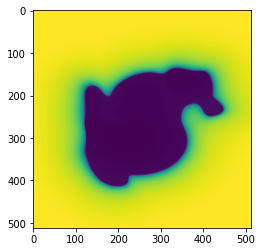

epoch 5001: 0.6428799033164978
epoch 5002: 0.6510392427444458
epoch 5003: 0.8324624300003052
epoch 5004: 0.689254879951477
epoch 5005: 0.6168412566184998
epoch 5006: 0.6331987977027893
epoch 5007: 0.7343865036964417
epoch 5008: 0.7793374061584473
epoch 5009: 0.757513165473938
epoch 5011: 0.6817957758903503
epoch 5012: 0.4501751661300659
epoch 5013: 0.5937784314155579
epoch 5014: 0.6672219038009644
epoch 5015: 0.7472068667411804
epoch 5016: 0.6091225147247314
epoch 5017: 0.6841331720352173
epoch 5018: 1.010437250137329
epoch 5019: 0.6323619484901428
epoch 5021: 0.600077748298645
epoch 5022: 0.47944217920303345
epoch 5023: 0.6243054866790771
epoch 5024: 0.5653843879699707
epoch 5025: 0.5488076210021973
epoch 5026: 0.8725719451904297
epoch 5027: 0.7756467461585999
epoch 5028: 0.7216737866401672
epoch 5029: 0.6500625610351562
epoch 5031: 0.6462655663490295
epoch 5032: 0.6546005606651306
epoch 5033: 0.7673635482788086
epoch 5034: 0.48384708166122437
epoch 5035: 0.6730853319168091
epoch 5036

epoch 5297: 0.68354332447052
epoch 5298: 0.8048833608627319
epoch 5299: 0.46564826369285583
epoch 5301: 0.5145120620727539
epoch 5302: 0.6767550706863403
epoch 5303: 0.5045808553695679
epoch 5304: 0.694982647895813
epoch 5305: 0.6176263689994812
epoch 5306: 0.812505304813385
epoch 5307: 0.6276397705078125
epoch 5308: 0.5675702095031738
epoch 5309: 0.7135987877845764
epoch 5311: 0.6361761093139648
epoch 5312: 0.6328285932540894
epoch 5313: 0.7124340534210205
epoch 5314: 0.6002885103225708
epoch 5315: 0.6597087979316711
epoch 5316: 0.6304959654808044
epoch 5317: 0.7354820370674133
epoch 5318: 0.5761642456054688
epoch 5319: 0.6525588631629944
epoch 5321: 0.5231383442878723
epoch 5322: 0.5188515186309814
epoch 5323: 0.480191171169281
epoch 5324: 0.7074095606803894
epoch 5325: 0.6318981051445007
epoch 5326: 0.5891709327697754
epoch 5327: 0.6343744993209839
epoch 5328: 0.8532597422599792
epoch 5329: 0.5345538258552551
epoch 5331: 0.5337637662887573
epoch 5332: 0.9052108526229858
epoch 5333: 

In [ ]:
bs = 2 ** 10

def generate_sphere_pc(ego, bs):
    '''
    Given an ego location and the number of points to sample, sample
    points on a sphere centered at the origin that are facing ego
    '''
    theta, phi, r = trand(bs) * np.pi * 2.0, trand(bs) * np.pi, 1.0
    
    point_batch = torch.stack((torch.sin(phi) * torch.cos(theta) * r,
                               torch.sin(phi) * torch.sin(theta) * r,
                               torch.cos(phi) * r), dim=1)
    
    aligned = torch.bmm(point_batch.unsqueeze(1), 
                        ego.unsqueeze(0).unsqueeze(2).expand(bs, -1, -1)) \
                        .squeeze()
    aligned = (aligned > 0).nonzero()

    return torch.gather(point_batch, dim=0, index=aligned.expand(-1, 3))

def generate_bunny_pc(ego, scale_factor=15.0):
    '''
    Given an ego location and the number of points to sample, sample
    points on a bunny centered at the origin that are facing ego
    '''
    point_batch = torch.from_numpy(get_bunny()).cuda() * scale_factor
    bs = point_batch.shape[0]
    
    aligned = torch.bmm(point_batch.unsqueeze(1), 
                        ego.unsqueeze(0).unsqueeze(2).expand(bs, -1, -1)) \
                        .squeeze()
    aligned = (aligned > 0).nonzero()

    upper_half = torch.gather(point_batch, dim=0, index=aligned.expand(-1, 3))
    
    return upper_half - upper_half.mean(dim=0)

def visualize_pointcloud_hemisphere(sph):
    with torch.no_grad():
        sph = sph.cpu().numpy()

        pts_fig = go.Figure(data=[go.Scatter3d(
            x=sph[:, 0],
            y=sph[:, 1],
            z=sph[:, 2],
            mode='markers',
            marker=dict(
                size=2,
                colorscale='Viridis',
                opacity=0.8
            )
        )])
        pts_fig.show()

'''sdf_siren = Siren(in_features=3, 
                  out_features=1, 
                  hidden_features=64,
                  hidden_layers=2,
                  outermost_linear=True)
sdf_siren = sdf_siren.cuda()'''
#sdf_siren = OccupancyNetwork().cuda()
sdf_siren = IGR(input_dims=3, 
                depths=[512, 512, 512, 512, 512, 512, 512, 512], 
                #L=10, 
                #geometric_init=False
               ).cuda()

optim = torch.optim.Adam(lr=1e-4, params=sdf_siren.parameters())

ego = torch.tensor([0.0, 0.0, 8.0]).cuda()

#point_batch = generate_sphere_pc(ego, bs)
point_batch = generate_bunny_pc(ego)

visualize_pointcloud_hemisphere(point_batch)

writer = SummaryWriter(
    os.path.join('logs', 'sphere_experiment', datetime.now().strftime("%Y%m%d-%H%M%S"))
)

for epoch in range(1000000):
    '''theta, phi, r = trand(bs) * np.pi * 2.0, trand(bs) * np.pi, 1.0
    point_batch = torch.stack((torch.sin(phi) * torch.cos(theta) * r,
                                   torch.sin(phi) * torch.sin(theta) * r,
                                   torch.cos(phi) * r), dim=1)'''

    #point_batch = generate_sphere_pc(ego, bs)
    #point_batch = generate_bunny_pc(ego)
    eikonal_points = trand((point_batch.shape[0], 3)).cuda() * 5.0 - 2.5

    point_batch = point_batch.cuda()
    model_output, coords = sdf_siren(point_batch)

    model_output_rand, coords_rand = sdf_siren(eikonal_points)
    gc = gradient(model_output_rand, coords_rand)

    sample_positions = sample_on_rays(point_batch, ego)
    ego_dist, _ = sdf_siren(ego.expand(2, ego.shape[0]).cuda())
    exterior_dist, _ = sdf_siren(sample_positions.view(-1, 3))

    with torch.no_grad():
        pc_normals = compute_normals(point_batch, ego, use_rings=False).cuda()

    c_reconstruction = 3e3 # 1.0
    c_eikonal = 5e1 # 1.0
    c_inter = 1e2 # 1.0
    c_ext = 1e2 # 1.0
    c_normals = 1e2

    l_reconstruction = (model_output ** 2).mean() * c_reconstruction
    l_eikonal = ((1.0 - (gc[:, 0] ** 2 + gc[:, 1] ** 2 + gc[:, 2] ** 2)) ** 2).mean() * c_eikonal
    l_inter = torch.exp(-1e2 * torch.abs(model_output_rand)).mean() * c_inter
    l_exterior = (torch.exp(torch.max(-exterior_dist,
                                      tz(exterior_dist.shape))).mean() - 1) * c_ext
    l_normals = (1 - torch.nn.functional.cosine_similarity(pc_normals, gc, dim=-1).mean()) * c_normals

    loss = l_reconstruction + l_eikonal + l_inter + l_exterior# + l_normals
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    with torch.no_grad():
        writer.add_scalar('Reconstruction Loss', 
                   l_reconstruction.item(), 
                   global_step=epoch)
        writer.add_scalar('Eikonal Loss', 
                   l_eikonal.item(), 
                   global_step=epoch)
        writer.add_scalar('Manifold Loss', 
                   l_inter.item(), 
                   global_step=epoch)
        writer.add_scalar('Exterior Loss', 
                   l_exterior.item(), 
                   global_step=epoch)
        writer.add_scalar('Normals Loss', 
                   l_normals.item(), 
                   global_step=epoch)
        writer.add_scalar('Loss', 
                   loss.item(), 
                   global_step=epoch)
        writer.flush()

    if epoch % 10:
        print("epoch {}: {}".format(epoch, loss))
    if epoch % 1000 == 0:
        print("reconstruction loss", l_reconstruction, 
            "eikonal loss", l_eikonal,
            "exterior loss", l_exterior,
            "inter loss", l_inter,
            "normal_loss", l_normals)
        print("worst of last batch", abs(model_output).max())
        render(sdf_siren, ego)